In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
house = pd.read_csv('housing.csv')
house

,MedianIncome,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


In [5]:
house.drop(['HouseAge' , 'AveRooms' , 'AveBedrms' , 'Population' , 'AveOccup' ] , axis = 1 ,inplace = True)
house

,MedianIncome,Latitude,Longitude,MedianHouseValue
0,8.3252,37.88,-122.23,4.526
1,8.3014,37.86,-122.22,3.585
2,7.2574,37.85,-122.24,3.521
3,5.6431,37.85,-122.25,3.413
4,3.8462,37.85,-122.25,3.422
...,...,...,...,...
20635,1.5603,39.48,-121.09,0.781
20636,2.5568,39.49,-121.21,0.771
20637,1.7000,39.43,-121.22,0.923
20638,1.8672,39.43,-121.32,0.847


In [6]:
kmeansdf = house.copy()
kmeansdf.drop('MedianHouseValue' , axis = 1 , inplace = True)
kmeansdf

,MedianIncome,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [7]:
data = kmeansdf.values

In [8]:
def k_means(data , k , it) :
    run = True
    cluster = np.zeros(data.shape[0])
    centroids = kmeansdf.sample(n = k).values
    while run : 
        for i , j in enumerate(data) :
            mindis = float('inf')
            for inx , cen in enumerate(centroids) :
                dis = np.sqrt((cen[0]-j[0])**2 + (cen[1]-j[1])**2 + (cen[2] - j[2])**2)
                if mindis > dis : 
                    mindis = dis
                    cluster[i] = inx
        new_cen = pd.DataFrame(data).groupby(by = cluster).mean().values
        it -= 1
        if np.count_nonzero(centroids - new_cen) == 0 or it == 0:
            run = False
            break
        else : 
            centroids = new_cen
    return centroids , cluster

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
silhouette  , davies = [] , []
for i in range(2,7) : 
    cen , cl = k_means(data , i , 10)
    print(i,cen)
    sc = silhouette_score(data , cl)
    silhouette.append(sc)
    t = davies_bouldin_score(data , cl)
    davies.append(t)
idxmax = silhouette.index(max(silhouette)) + 2
print(silhouette,davies)
print("Optimal K for kmeans clustering occurs when silhouette score is highest and davies_bouldin_score is lowest")
print("Optimal K for Kmeans Clustering - " + str(idxmax))

2 [[   3.79983026   37.95576636 -121.71561113]
 [   3.92225787   33.93957297 -118.00703592]]
3 [[   3.69472757   37.98371499 -121.73500532]
 [   3.0714407    33.97983439 -117.99998136]
 [   6.7397103    34.04946388 -118.25809742]]
4 [[   2.31355838   34.36311562 -118.31272819]
 [   4.28489403   33.78767038 -117.86668153]
 [   3.70733652   38.05229553 -121.81468318]
 [   8.44283314   34.48160344 -118.75221188]]
5 [[   6.39754221   33.86172348 -118.05169481]
 [   6.15128231   37.67171355 -121.97554987]
 [   3.06945987   33.82167603 -117.84494567]
 [   2.70168431   36.08892711 -119.72695044]
 [   2.97575969   38.29728695 -121.90016381]]
6 [[   8.07706231   33.84972546 -118.06      ]
 [   2.69470185   33.41990749 -117.13446173]
 [   6.26614695   37.65446945 -121.94997244]
 [   2.44250945   34.59625984 -118.664375  ]
 [   4.58585016   33.9281085  -118.06553731]
 [   3.01992913   38.19583888 -121.79001664]]
[0.5665094919763822, 0.4983903383975524, 0.4146930714035079, 0.41267583072755926, 0.3

In [10]:
centroids , cluster = k_means(data , 2 , 50)

Boxplot for 2 clusters since k = 2 is most optimal


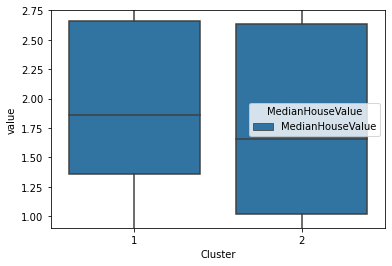

In [11]:
print("Boxplot for 2 clusters since k = 2 is most optimal")
cluster1 , cluster2 = [] , []
for i in range(len(cluster)) :
    a = house.iloc[i]
    if cluster[i] == 0 : 
        cluster1.append(a['MedianHouseValue'])
    else : cluster2.append(a['MedianHouseValue'])
cl1 = pd.DataFrame(cluster1 , columns=['MedianHouseValue']).assign(Cluster=1)
cl2 = pd.DataFrame(cluster2 , columns=['MedianHouseValue']).assign(Cluster=2)
cdf = pd.concat([cl1,cl2])
mdf = pd.melt(cdf , id_vars=['Cluster'] , var_name=['MedianHouseValue'])
mdf
ax = sns.boxplot( x= "Cluster" ,y = "value" , hue = "MedianHouseValue", data=mdf)
plt.ylim(0.9 , 2.75)
plt.show()